# Python visual analyzation of results

## Imports

In [ ]:
import pandas as pd
import io
from google.colab import files
import os
import seaborn as sns;
import matplotlib.pyplot as plt


## Helper Class

In [ ]:

class helper():
    @staticmethod
    def filesStartWith(name):
        files=[];
        for file in os.listdir("/content"):
          if file.startswith(name):
              files.append(file);
        return files; 
    def plotTen(title,data,min=0,max=1):
      fig, ax =plt.subplots(2,5)
      fig.set_figheight(10)
      fig.set_figwidth(30)
      fig.tight_layout(h_pad=5, w_pad=5)
      counter=range(0,10,1);
      for index in counter:
        if index < 5:
          ax[0,index].set_title('Epoch '+ str(index))
          sns.heatmap(data[index],ax=ax[0,index],vmin=min,vmax=max, linewidths=.001)
          ax[0,index].set_xlabel('Threshold 0.1 - 1.0')
          ax[0,index].set_ylabel('Samples');
        else:
          ax[1,(index-5)].set_title('Epoch '+ str(index))    
          sns.heatmap(data[index],ax=ax[1,(index-5)],vmin=min,vmax=max, linewidths=.001)
          ax[1,(index-5)].set_xlabel('Threshold')
          ax[1,(index-5)].set_ylabel('Samples');
      fig.suptitle(title, fontsize=18, y=1.05)
      plt.show()

    def plotMean(title,data):
      plt.figure(figsize=(10,10))
      ax =  sns.heatmap(data.sort_index(ascending=False), linewidths=.3, annot=True, fmt=".3f")
      ax.set_title(title)
      ax.set_xlabel('Threshold')
      ax.set_ylabel('Epoch')
      plt.show()
    
    def formatDf(data):
      lenghts=[len(data[column][data[column]>0]) for column in data ]
      for column in data:
          half = round((290-lenghts[column])/2)
          cl=[]
          cl[0:half]= [0]*half
          cl[half:len(data[column][data[column]>0])]=data[column][data[column]>0]
          tmp= len(data[column][data[column]>0])+half;
          cl[tmp:290]=[0]* (290-tmp)
          data[column]=cl
      return data;





## File Upload

In [ ]:
uploaded = files.upload()


Saving accuracy.csv to accuracy.csv
Saving accuracy_13127.csv to accuracy_13127.csv
Saving accuracy_26254.csv to accuracy_26254.csv
Saving accuracy_39381.csv to accuracy_39381.csv
Saving accuracy_52508.csv to accuracy_52508.csv
Saving accuracy_65635.csv to accuracy_65635.csv
Saving accuracy_78762.csv to accuracy_78762.csv
Saving accuracy_91889.csv to accuracy_91889.csv
Saving accuracy_105016.csv to accuracy_105016.csv
Saving accuracy_118143.csv to accuracy_118143.csv
Saving accuracy_131270.csv to accuracy_131270.csv
Saving dice.csv to dice.csv
Saving dice_13127.csv to dice_13127.csv
Saving dice_26254.csv to dice_26254.csv
Saving dice_39381.csv to dice_39381.csv
Saving dice_52508.csv to dice_52508.csv
Saving dice_65635.csv to dice_65635.csv
Saving dice_78762.csv to dice_78762.csv
Saving dice_91889.csv to dice_91889.csv
Saving dice_105016.csv to dice_105016.csv
Saving dice_118143.csv to dice_118143.csv
Saving dice_131270.csv to dice_131270.csv
Saving jaccard.csv to jaccard.csv
Saving jac

## Select Files 

In [ ]:
col_Names=["0.1", "0.2", "0.3", "0.4","0.5","0.6","0.7","0.8","0.9","1.0"];
files = helper.filesStartWith("accuracy_");
rvd_files= helper.filesStartWith("rvd_");
dice_files= helper.filesStartWith("dice_");
jaccard_files= helper.filesStartWith("jaccard_");
accuracies=[];
rvds=[];
dices=[];
jaccards=[];
for filename in files:
  accuracies.append(pd.read_csv(filename,names=col_Names,sep=';'));
for filename in rvd_files:
  rvds.append(pd.read_csv(filename,names=col_Names,sep=';'));
for filename in dice_files:
  dices.append(pd.read_csv(filename,names=col_Names,sep=';'));
for filename in jaccard_files:
  jaccards.append(pd.read_csv(filename,names=col_Names,sep=';'));

## Plot results for each epoch and threshold

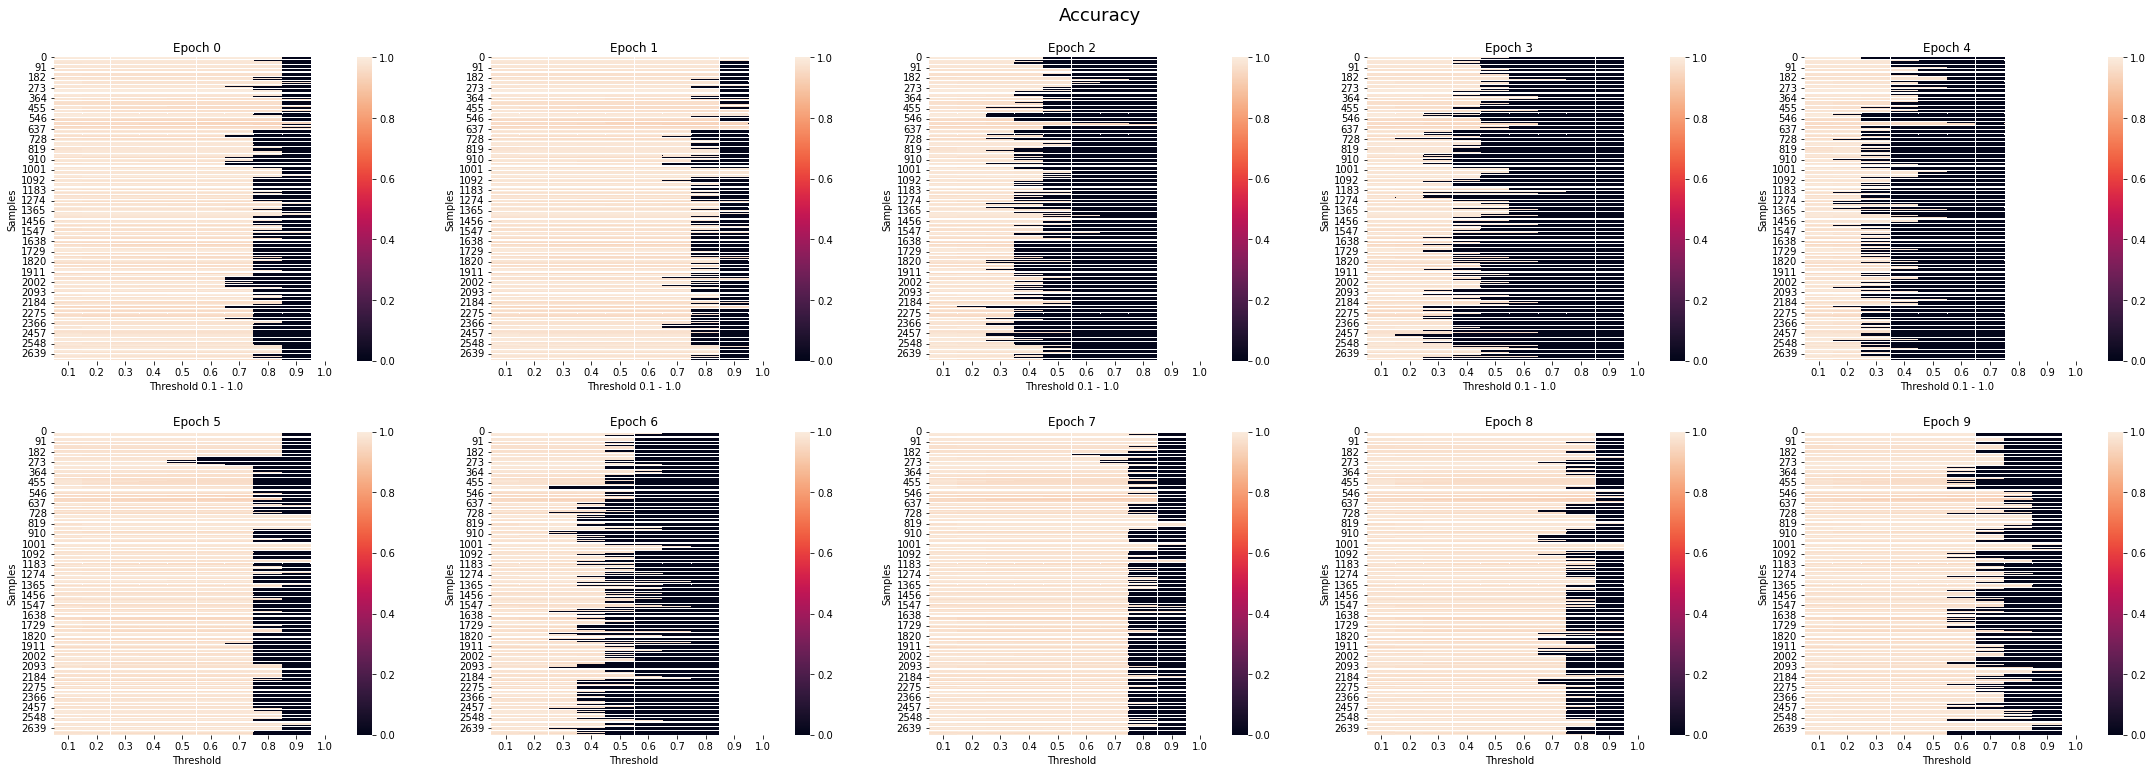

In [ ]:
helper.plotTen("Accuracy",accuracies)

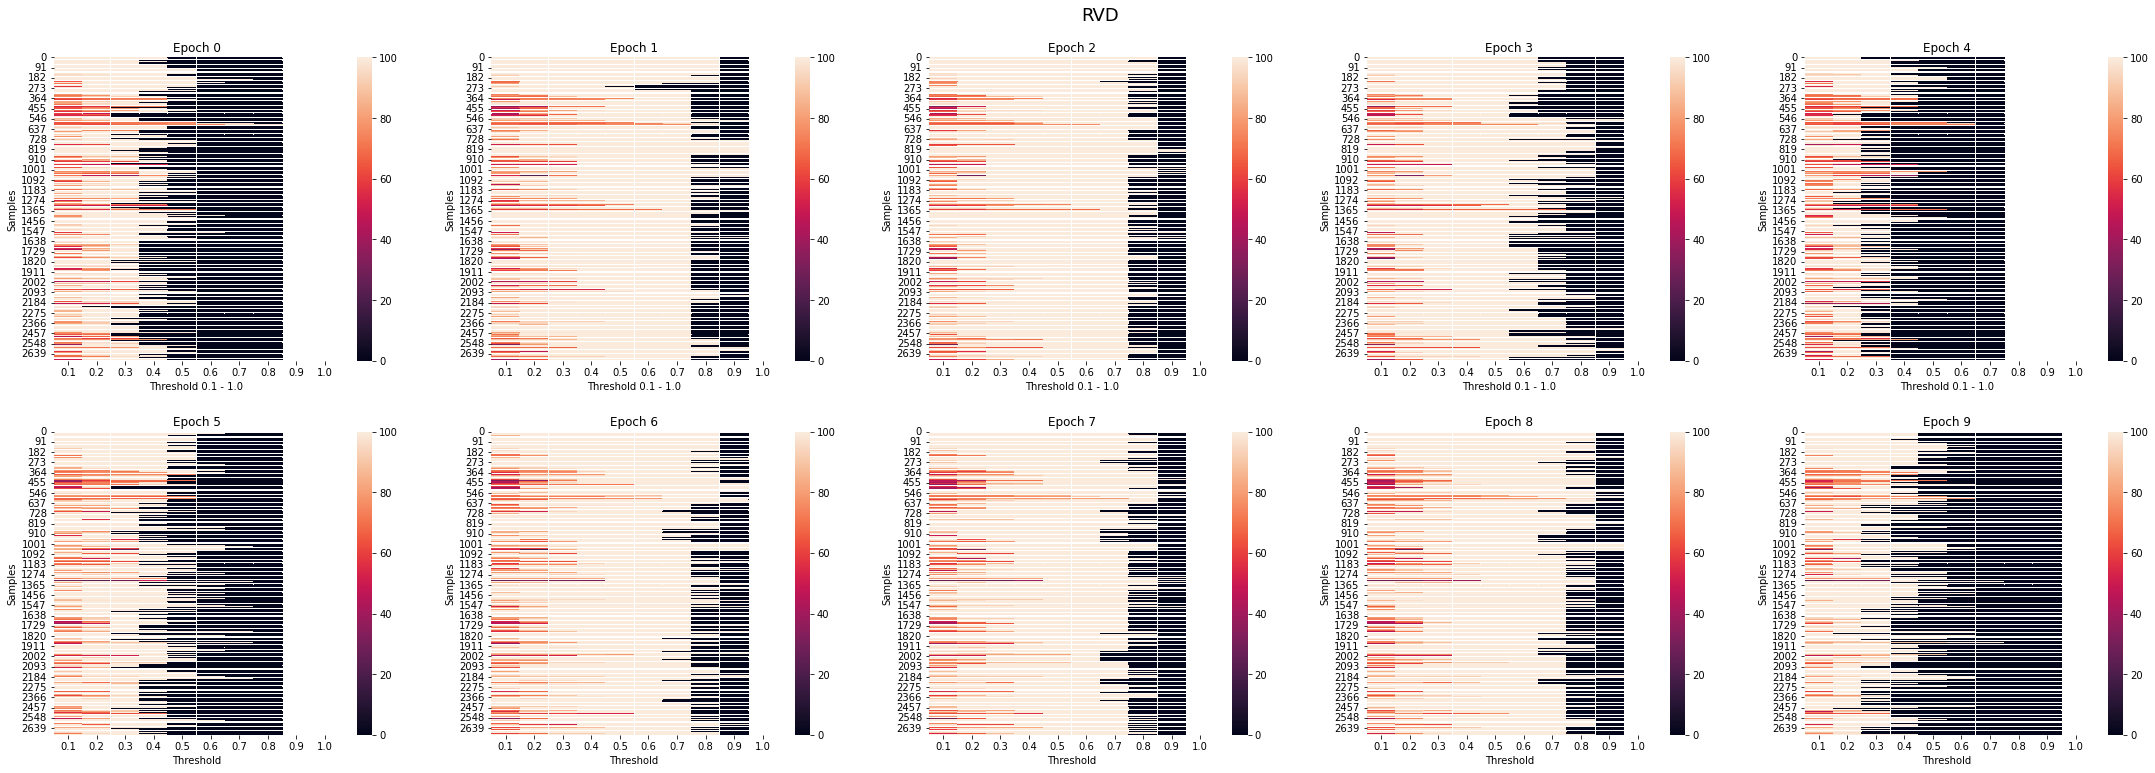

In [ ]:
helper.plotTen('RVD',rvds,min=0,max=100)

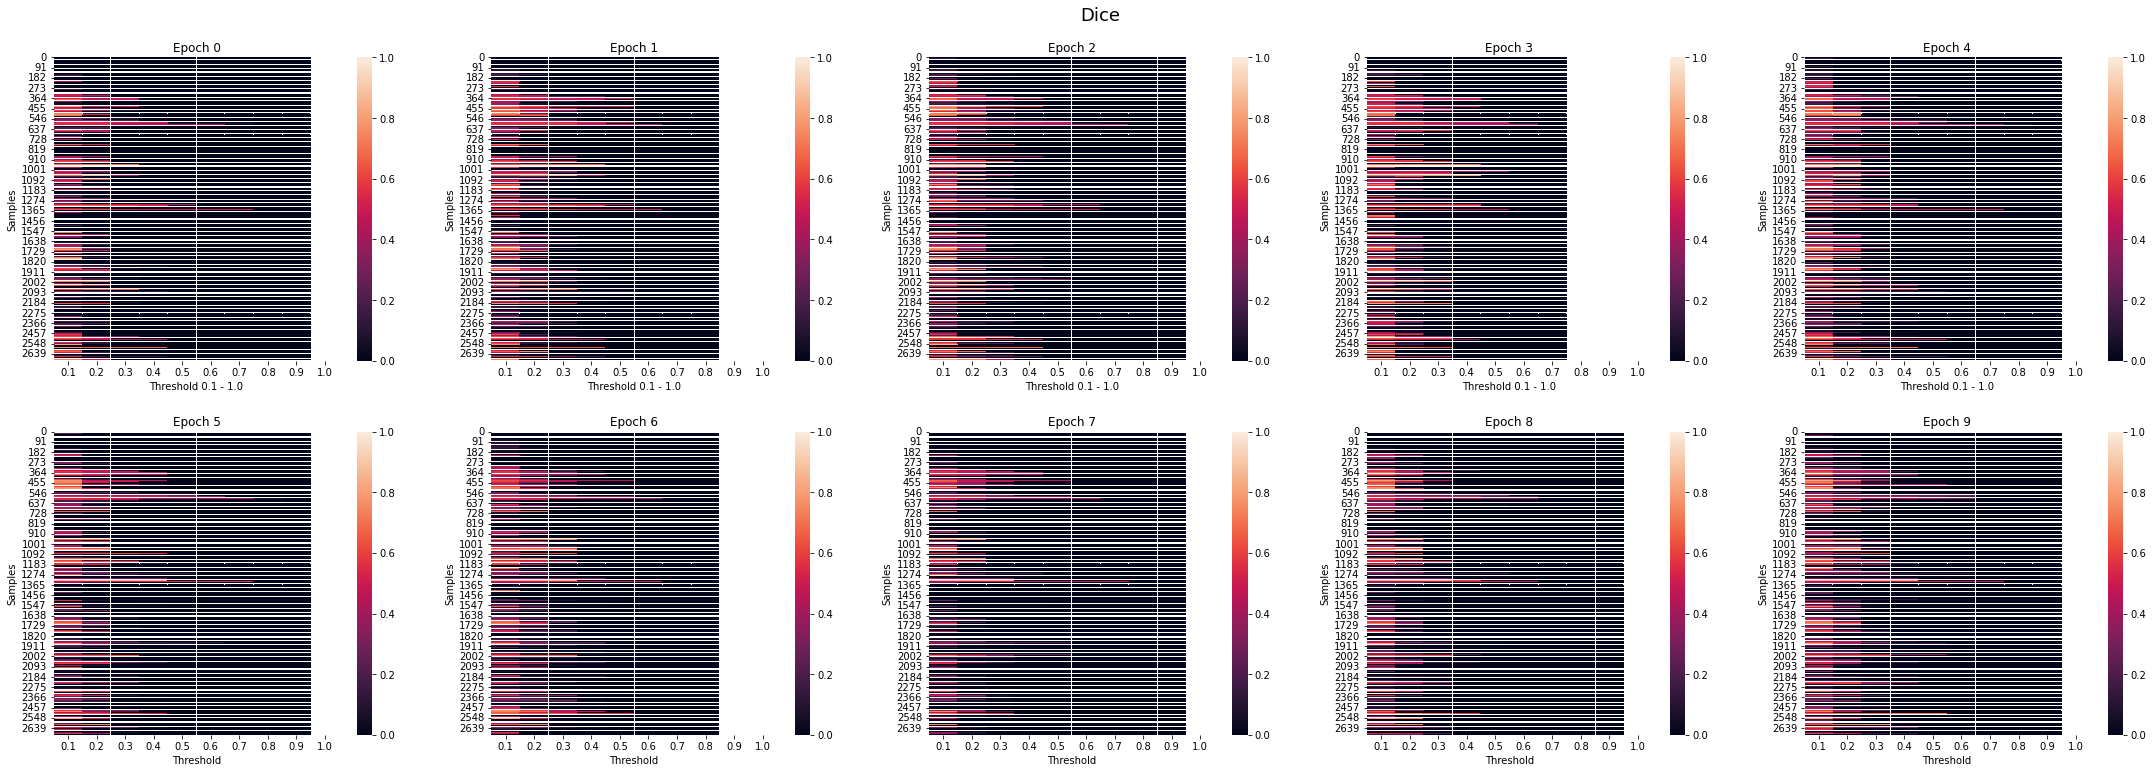

In [ ]:
helper.plotTen('Dice',dices)

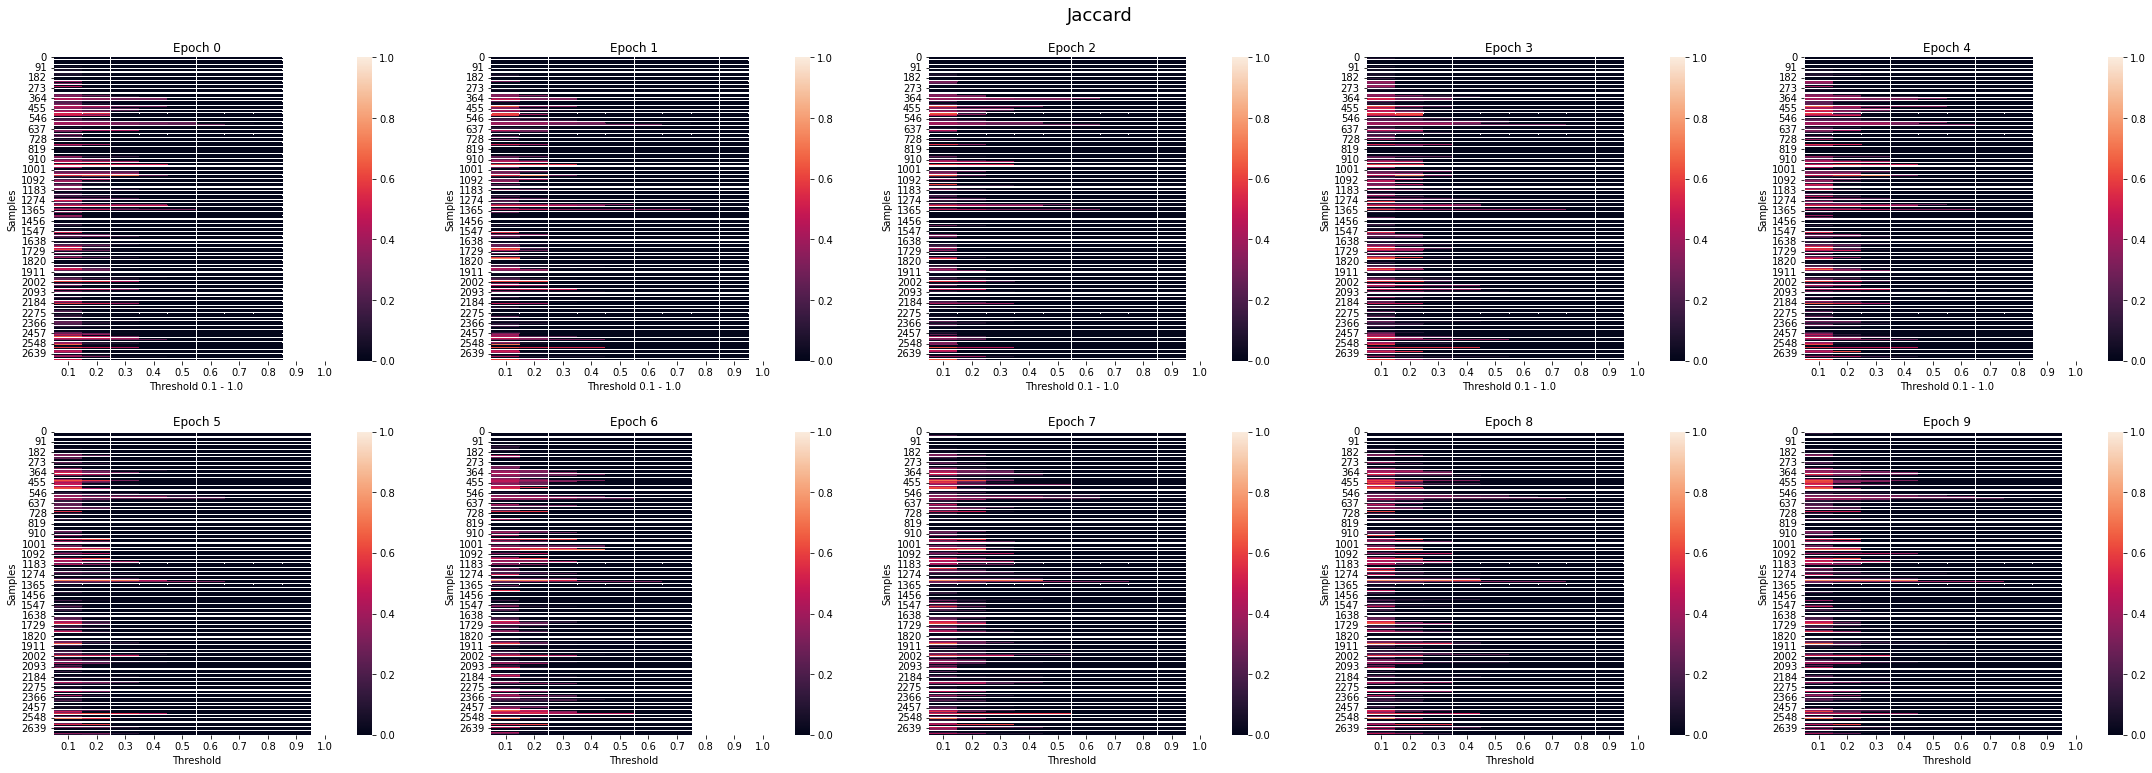

In [ ]:
helper.plotTen('Jaccard',jaccards)

## Taking the mean for each metric

In [ ]:
counter=range(0,10,1);
accuracy_mean = pd.DataFrame()
rvd_mean= pd.DataFrame()
dice_mean=pd.DataFrame()
jaccard_mean=pd.DataFrame()
for index in counter:
  accuracy_mean[index]=accuracies[index].mean()
  rvd_mean[index]=rvds[index].mean()
  dice_mean[index]=dices[index].mean()
  jaccard_mean[index]=jaccards[index].mean()

In [ ]:
counter = range(1,11)
accuracy_mean =accuracy_mean.transpose()
rvd_mean= rvd_mean.transpose()
dice_mean= dice_mean.transpose()
jaccard_mean= jaccard_mean.transpose()

accuracy_mean.index = counter
rvd_mean.index=counter
dice_mean.index=counter
jaccard_mean.index=counter

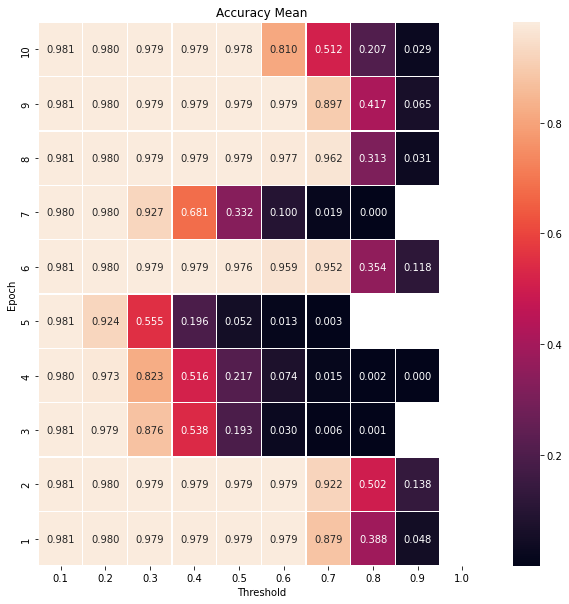

In [ ]:
helper.plotMean("Accuracy Mean",accuracy_mean)

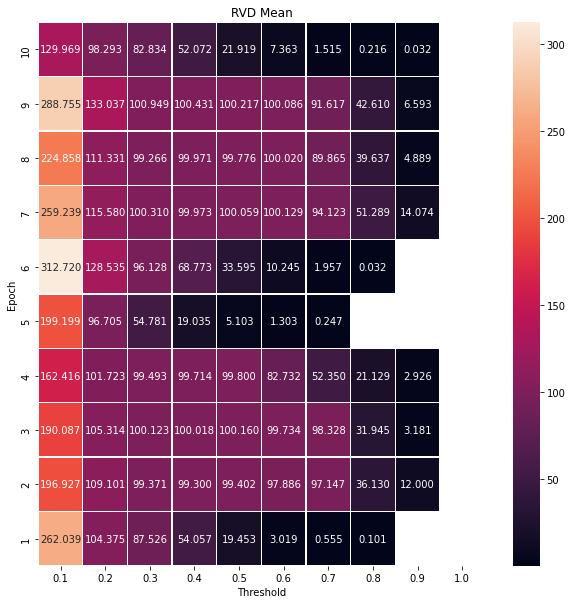

In [ ]:
helper.plotMean("RVD Mean",rvd_mean)

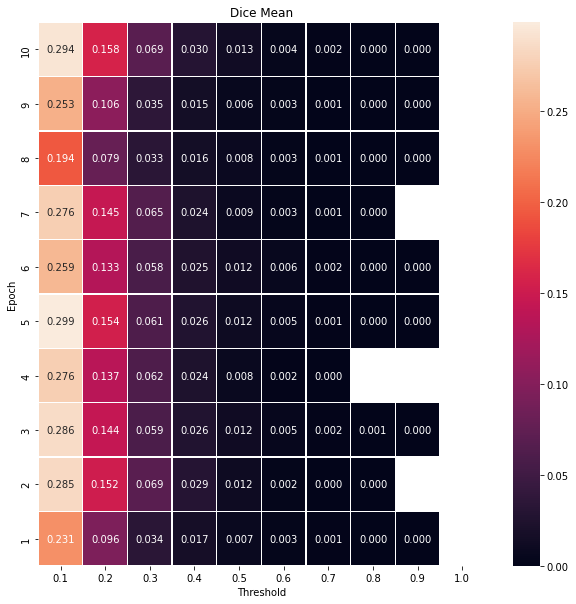

In [ ]:
helper.plotMean("Dice Mean",dice_mean)

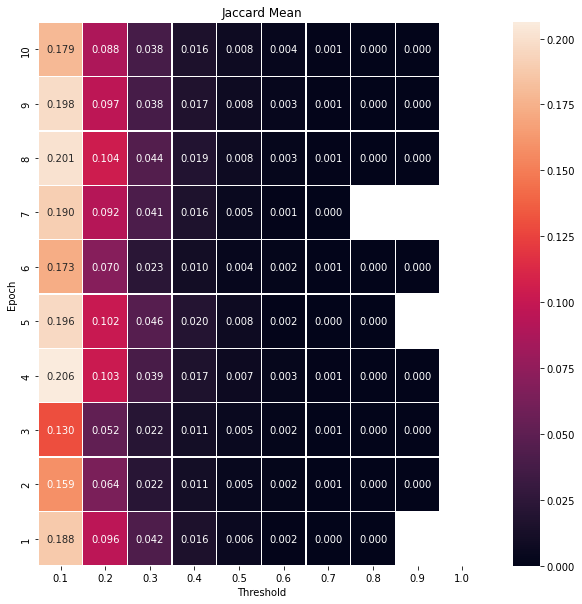

In [ ]:
helper.plotMean("Jaccard Mean",jaccard_mean)

## Mean Values over each slice of kidney - top down

In [ ]:
accuracy=pd.read_csv('accuracy.csv', header=None)
dice=pd.read_csv('dice.csv', header=None)
jaccard=pd.read_csv('jaccard.csv', header=None)
rvd=pd.read_csv('rvd.csv', header=None)

accuracy=helper.formatDf(accuracy);
dice=helper.formatDf(dice);
jaccard=helper.formatDf(jaccard);
rvd=helper.formatDf(rvd);

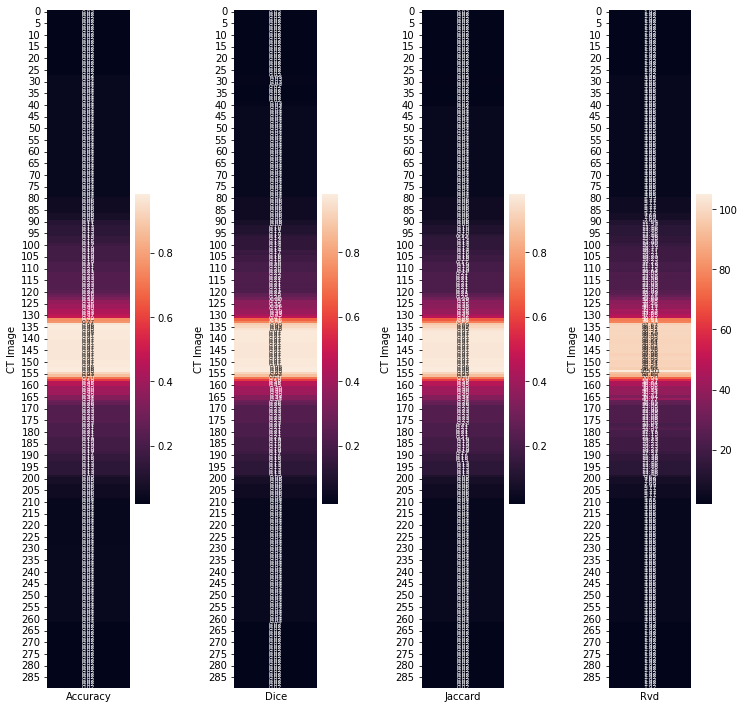

In [ ]:
fig,( ax1,ax2,ax3,ax4) =plt.subplots(ncols=4)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.tight_layout(h_pad=5, w_pad=5)

sns.heatmap( accuracy.mean(axis=1).to_frame(), annot=True, fmt=".2f",annot_kws={"size": 6},ax=ax1, xticklabels=False)
ax1.set_title('')
ax1.set_xlabel('Accuracy')
ax1.set_ylabel('CT Image')

sns.heatmap( dice.mean(axis=1).to_frame(), annot=True, fmt=".2f",annot_kws={"size": 6}, ax=ax2, xticklabels=False)
ax2.set_title('')
ax2.set_xlabel('Dice')
ax2.set_ylabel('CT Image')

sns.heatmap( jaccard.mean(axis=1).to_frame(), annot=True, fmt=".2f",annot_kws={"size": 6},ax=ax3, xticklabels=False)
ax3.set_title('')
ax3.set_xlabel('Jaccard')
ax3.set_ylabel('CT Image')


sns.heatmap( rvd.mean(axis=1).to_frame(), annot=True, fmt=".2f",annot_kws={"size": 6},ax=ax4, xticklabels=False)
ax4.set_title('')
ax4.set_xlabel('Rvd')
ax4.set_ylabel('CT Image')

plt.show()


### Value distribution

In [ ]:
import plotly.express as px

fig=px.histogram(accuracy.mean(),nbins = 10, color_discrete_sequence=['#4b0249'] ,
                   title='Accuracy Distribution', text_auto=True,  labels={'value':'Accuracy','count':'Count'})
fig.update_layout(showlegend=False)
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1.0]    )
)

fig.show()

In [ ]:
fig=px.histogram(dice.mean(),nbins = 10, color_discrete_sequence=['#4b0249'] ,
                   title='Dice Distribution', text_auto=True,  labels={'value':'Dice','count':'Count'})
fig.update_layout(showlegend=False)
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1.0]    )
)

fig.show()

In [ ]:
fig=px.histogram(jaccard.mean(),nbins = 10, color_discrete_sequence=['#4b0249'] ,
                   title='Jaccard Distribution', text_auto=True,  labels={'value':'Jaccard','count':'Count'})
fig.update_layout(showlegend=False)
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1.0]    )
)

fig.show()

In [ ]:
fig=px.histogram(rvd.mean(),nbins = 10, color_discrete_sequence=['#4b0249'] ,
                   title='RVD Distribution', text_auto=True,  labels={'value':'RVD','count':'Count'})
fig.update_layout(showlegend=False)

fig.show()

## Time analysis

In [ ]:
time=pd.read_csv('time.csv', header=None)

time.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.776024,0.723992,0.730825,0.738769,0.731758,0.729302,0.723156,0.728007,0.727277,0.726220,...,0.732203,0.727258,0.722514,0.725154,0.726333,0.728539,0.735174,0.724818,0.732066,0.740106
1,0.775626,0.722257,0.731860,0.737679,0.728856,0.726785,0.722476,0.727704,0.732931,0.727397,...,0.726006,0.732084,0.722942,0.723534,0.725981,0.728079,0.742790,0.727001,0.730428,0.727024
2,0.742813,0.723129,0.732697,0.736444,0.727294,0.729380,0.722084,0.730073,0.722137,0.726821,...,0.727968,0.731371,0.721876,0.727481,0.728146,0.728322,0.747711,0.726739,0.729740,0.726912
3,0.742685,0.723317,0.735534,0.735868,0.731093,0.733881,0.721323,0.726668,0.723495,0.729933,...,0.721954,0.721895,0.728968,0.723349,0.724395,0.730847,0.751316,0.722529,0.729328,0.737369
4,0.717949,0.726401,0.740903,0.739539,0.726423,0.730096,0.721131,0.728219,0.732280,0.723905,...,0.724126,0.724116,0.720082,0.726078,0.726728,0.730959,0.730272,0.725876,0.728900,0.721653


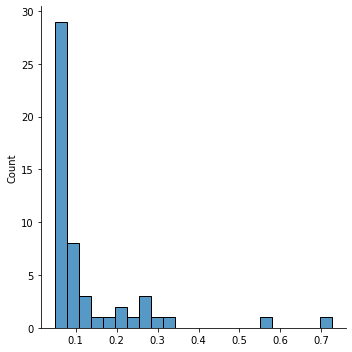

In [ ]:
sns.displot(time.mean())

In [ ]:
time.mean().mean()

0.12643905205106767